In [1]:
import numpy as np
import itertools
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import collections
import os
from utils import resproc


In [5]:
js=resproc.load_json('../experiments/xdat.json')

In [6]:
dset = [resproc.merge_dicts([x['inp'], x['out'], x['misc'], 
                     {
                         'data':x['inp']['data'], 
                         'status_c': int(x['out']['status'], 16),
                         'time_b': int(x['misc']['timing'])
                     }]) for x in js]

dset = resproc.uniq(dset, lambda x: bytes(x['data']))

In [7]:
dframe = pd.DataFrame(dset)


/Users/dusanklinec/workspace/APDUFuzzer/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


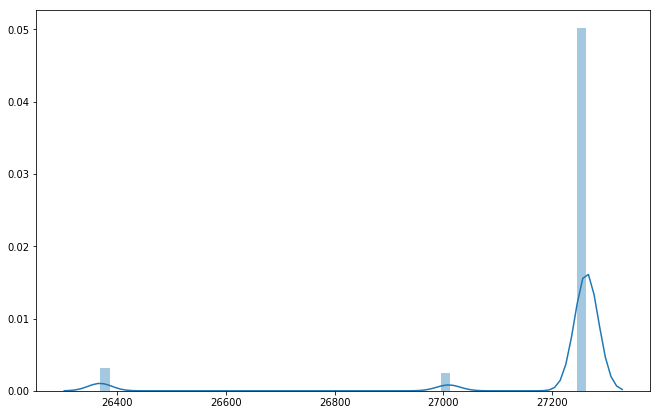

In [9]:
fig, ax = plt.subplots(figsize=(11,7))
#ax = sns.barplot(ax=ax, y='time_b', data=dframe, linewidth=0.5, errwidth=0)
#ax = sns.distplot([x['time_b'] for x in dset], ax=ax, bins=range(1, 210, 10))
ax = sns.distplot([x['status_c'] for x in dset], ax=ax)
#ax.set_xlim([0, 200])


In [ ]:
fnc = lambda x: x['status_str']
fnc2 = lambda x: (x['status_str'], x['data'])

dset.sort(key=fnc2)
for g, k in itertools.groupby(dset, key=fnc):
    kl = list(k)
    print('%s: ln=%s' % (g, len(kl)))
    print('\n'.join([str(x['data']) for x in kl]))
    


45402911
45402911
